In [15]:
import ogs
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})

In [16]:
model_mc=ogs.OGS(INPUT_FILE="load_test_mc_nonassociated.prj", PROJECT_FILE="load_test_mc_nonassociated.prj")
model_dp=ogs.OGS(INPUT_FILE="load_test_dp_nonassociated.prj", PROJECT_FILE="load_test_dp_nonassociated.prj")

In [17]:
model_mc.replaceParameter(name="DilatancyAngle", value=10)
model_mc.writeInput()

True

In [18]:
model_dp.replaceParameter(name="DilatancyParameter", value=0.1)
model_dp.writeInput()

True

In [19]:
model_mc.runModel(path='~/ogs_release/bin')

OGS finished


In [20]:
model_dp.runModel(path='~/ogs_release/bin')

OGS finished


In [21]:
pvd_mc = vtuIO.PVDIO(".", "load_test_mc.pvd", dim=2)
pvd_dp = vtuIO.PVDIO(".", "load_test_dp.pvd", dim=2)

./load_test_mc.pvd
./load_test_dp.pvd


In [22]:
pts = {"pt0": (1000,500,0.0)}

In [23]:
results_mc = {}
results_dp = {}

In [24]:
results_mc["displacement"] = pvd_mc.readTimeSeries("displacement", pts=pts)
results_dp["displacement"] = pvd_dp.readTimeSeries("displacement", pts=pts)

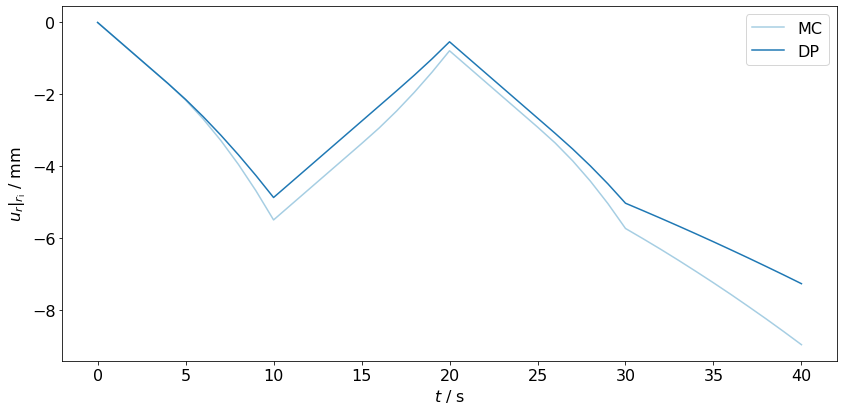

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(pvd_mc.timesteps,results_mc['displacement']['pt0'].T[0],label='MC')
ax.plot(pvd_dp.timesteps,results_dp['displacement']['pt0'].T[0],label='DP')
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$u_r|_{r_\\mathrm{i}}$ / mm')
ax.legend()
fig.tight_layout();

In [26]:
raxis =  [(i,500,0) for i in np.linspace(start=1000, stop=2000, num=100)]

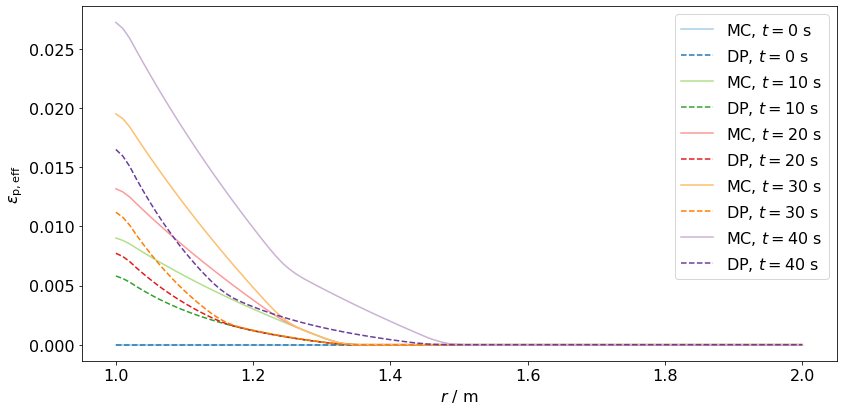

In [27]:
sns.set_palette("Paired",n_colors=10)
fig, ax = plt.subplots(figsize=(12,6))
for i in [0,10,20,30,40]:
    ax.plot(np.array(raxis).T[0]/1000,pvd_mc.readPointSetData(i, 'EquivalentPlasticStrain', pointsetarray=raxis),
            label='MC, $t = %i$ s' %i)
    ax.plot(np.array(raxis).T[0]/1000,pvd_dp.readPointSetData(i, 'EquivalentPlasticStrain', pointsetarray=raxis),
            label='DP, $t = %i$ s' %i, ls='--')

ax.set_xlabel('$r$ / m')
ax.set_ylabel('$\\epsilon_\\mathrm{p,eff}$')
ax.legend()
fig.tight_layout();

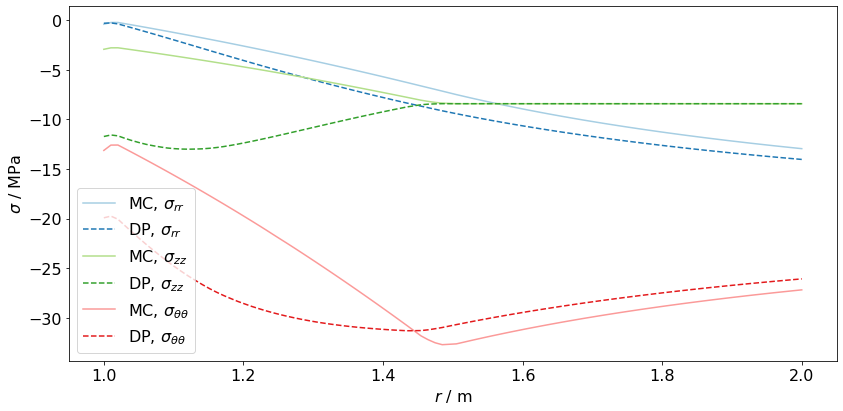

In [28]:
sns.set_palette("Paired",n_colors=10)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(np.array(raxis).T[0]/1000,pvd_mc.readPointSetData(i, 'sigma', pointsetarray=raxis).T[0],
            label='MC, $\\sigma_{rr}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_dp.readPointSetData(i, 'sigma', pointsetarray=raxis).T[0],
            label='DP, $\\sigma_{rr}$', ls='--')

ax.plot(np.array(raxis).T[0]/1000,pvd_mc.readPointSetData(i, 'sigma', pointsetarray=raxis).T[1],
            label='MC, $\\sigma_{zz}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_dp.readPointSetData(i, 'sigma', pointsetarray=raxis).T[1],
            label='DP, $\\sigma_{zz}$', ls='--')

ax.plot(np.array(raxis).T[0]/1000,pvd_mc.readPointSetData(i, 'sigma', pointsetarray=raxis).T[2],
            label='MC, $\\sigma_{\\theta\\theta}$')
ax.plot(np.array(raxis).T[0]/1000,pvd_dp.readPointSetData(i, 'sigma', pointsetarray=raxis).T[2],
            label='DP, $\\sigma_{\\theta\\theta}$', ls='--')

ax.set_xlabel('$r$ / m')
ax.set_ylabel('$\\sigma$ / MPa')
ax.legend()
fig.tight_layout();